In [31]:
import cv2
import numpy as np
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

img = cv2.imread('images/r1.jpg')
rows,cols,colors = img.shape

OpenCV Version : 3.1.0 


Covert color to RGB to use matplotlib

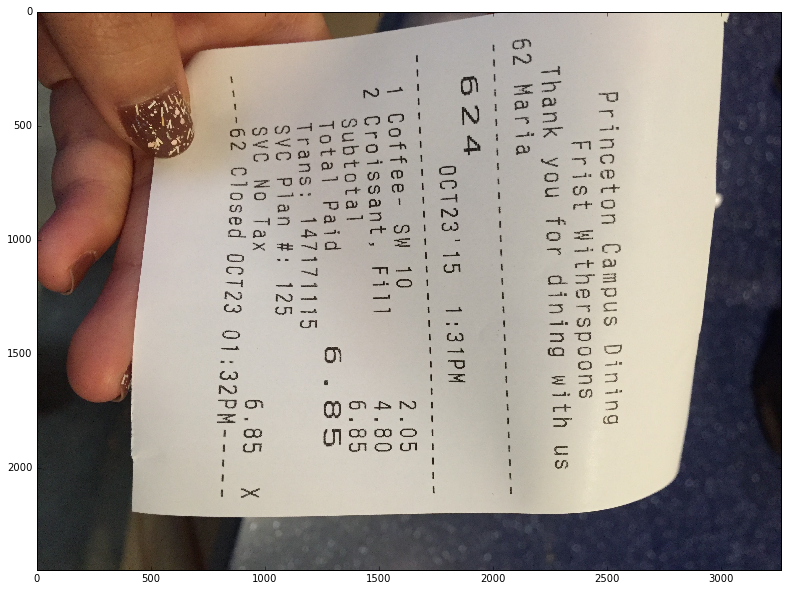

In [32]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()

Rotate

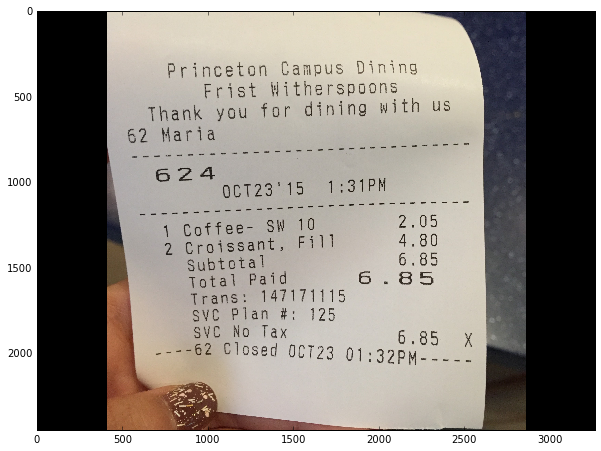

In [33]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
img = cv2.warpAffine(img,M,(cols,rows))
plt.figure(figsize=(10,20))
plt.imshow(img)
rows,cols,colors = img.shape

# Canny edge detection

http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

1. Noise reduction with 5x5 gaussian
2. Sorbel kernel in horizontal and vertical to get gradient $Edge_grad(G) = \sqrt{G_x^2+G_y^2}$
3. Find which pixels are on the edge (and surpress all others)
    a. These pixels are the ones that are local max's in the direction of the gradient
4. Thresholding


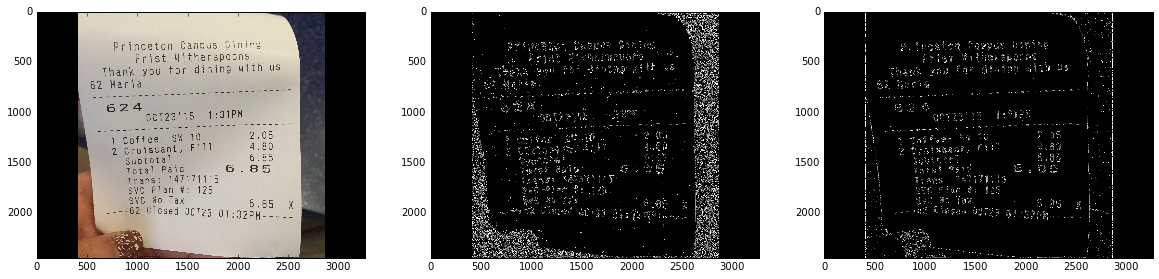

In [48]:
edges1 = cv2.Canny(img, 10,50)
edges2 = cv2.Canny(edges2, 50,100)

f,ax=plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(img,cmap = 'gray')
ax[1].imshow(edges1,cmap = 'gray')
ax[2].imshow(edges2,cmap = 'gray')


# Previous things


In [ ]:
#http://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/
#import argparse # parse command line 
#import glob #  paths to our images from disk
 
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
 
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
 
    # return the edged image
    return edged